## Goal and metric

### Goal: To predict if a passenger survived the sinking of the Titanic or not.

### Metric: Accuracy, The percentage of passengers the model correctly predict.

### Exploring the Data

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read data and get train info
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
# get statisitcs  
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# show the overall survival rate 
print('Overall Survival Rate:', round(train['Survived'].mean(), 3))

Overall Survival Rate: 0.384


## Data cleaning and feature selection

In [5]:
# get_dummies function
def dummies(col,train,test):
    train_dum = pd.get_dummies(train[col])
    test_dum = pd.get_dummies(test[col])
    train = pd.concat([train, train_dum], axis=1)
    test = pd.concat([test,test_dum],axis=1)
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)
    return train, test

# delete the useless cols
dropping = ['PassengerId', 'Name', 'Ticket']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)

3    491
1    216
2    184
Name: Pclass, dtype: int64


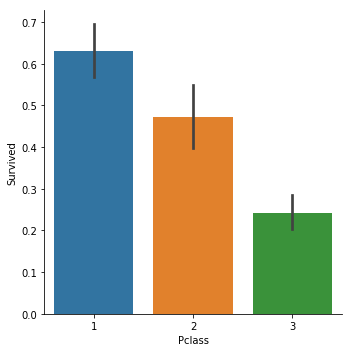

In [6]:
# pclass
# ensure no NA contained
print(train.Pclass.value_counts(dropna=False))
sns.catplot('Pclass', 'Survived',data=train, order=[1,2,3], kind='bar')
# according to the graph, we found there are huge differences between
# each pclass group. keep the ft
train, test = dummies('Pclass', train, test)
plt.show()

male      577
female    314
Name: Sex, dtype: int64


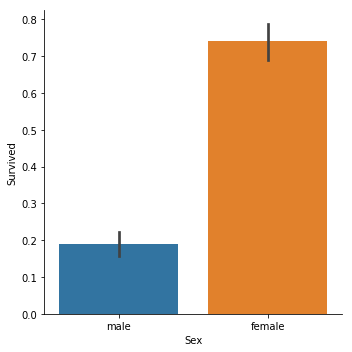

In [7]:
# sex
print(train.Sex.value_counts(dropna=False))
sns.catplot('Sex','Survived', data=train, kind='bar')
# female survival rate is way better than the male
train, test = dummies('Sex', train, test)
plt.show()

In [8]:
#age 
#dealing the missing data
nan_num = train['Age'].isnull().sum()
print(nan_num)

177


In [9]:
check = train[train['Age'].notnull()]
print(len(check))

714


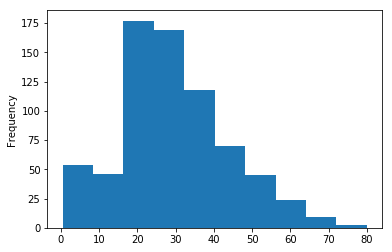

In [10]:
check['Age'].plot(kind='hist')
plt.show()

In [11]:
# there are 177 missing value, fill with random int
age_mean = train['Age'].mean()
age_std = train['Age'].std()
filling = np.random.randint(age_mean-2*age_std, age_mean+2*age_std, size=nan_num)
train['Age'][train['Age'].isnull()==True] = train['Age'].mean()
nan_num = train['Age'].isnull().sum()
print(nan_num)

0


In [12]:
# dealing the missing val in test
nan_num = test['Age'].isnull().sum()

In [13]:
# 86 null
age_mean = test['Age'].mean()
age_std = test['Age'].std()
filling = np.random.randint(age_mean-2*age_std,age_mean+2*age_std,size=nan_num)
filling = test['Age'].mean()
test['Age'][test['Age'].isnull()==True]=filling
nan_num = test['Age'].isnull().sum()
print(nan_num)

0


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


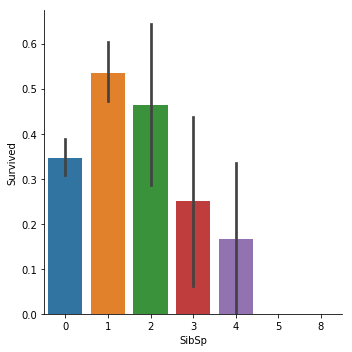

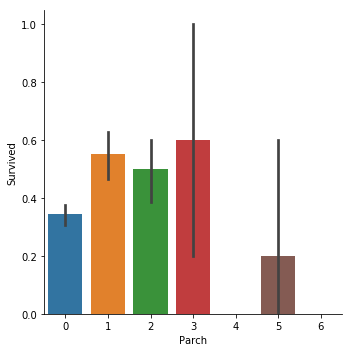

In [14]:
#family
print(train['SibSp'].value_counts(dropna=False))
print(train['Parch'].value_counts(dropna=False))

sns.catplot('SibSp','Survived',data=train,height=5, kind='bar')
sns.catplot('Parch','Survived',data=train,height=5, kind='bar')
plt.show()

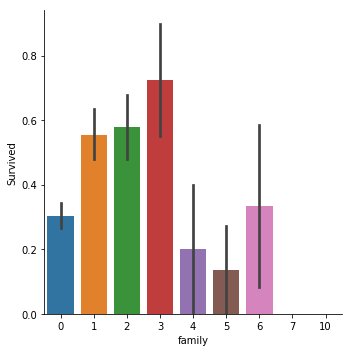

In [15]:
'''through the plot, we suggest that with more family member, 
the survival rate will drop, we can create the new col
add up the parch and sibsp to check our theory''' 

train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']
sns.catplot('family','Survived',data=train,height=5, kind='bar')

train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [16]:
# fare
print(train.Fare.isnull().sum())
print(test.Fare.isnull().sum())

0
1


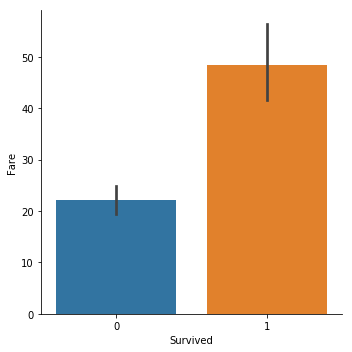

In [17]:
sns.catplot('Survived','Fare',data=train,height=5, kind='bar')
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [18]:
#Cabin
# checking missing val
# 687 out of 891 are missing, drop this col
train.Cabin.isnull().sum()

687

In [19]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [20]:
#Embark
print(train.Embarked.isnull().sum())
# 2 missing value
train.Embarked.value_counts()

2


S    644
C    168
Q     77
Name: Embarked, dtype: int64

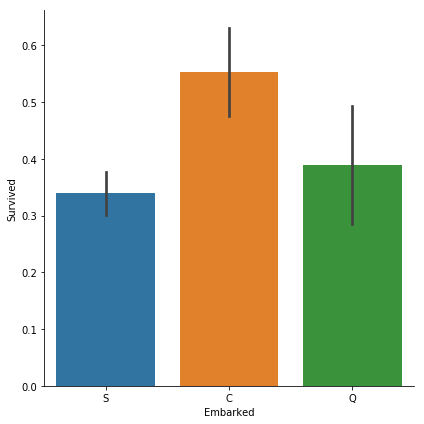

In [21]:
# fill the majority val,'s', into missing val col
train['Embarked'].fillna('S',inplace=True)

sns.catplot('Embarked','Survived',data=train,height=6, kind='bar')
train,test = dummies('Embarked',train,test)

In [22]:
# normalization 'Fare' feature
train['Fare'] = (train['Fare'] - train['Fare'].mean())/train['Fare'].std()

In [23]:
train.corr()

,Survived,Age,Fare,1,2,3,female,male,family,C,Q,S
Survived,1.000000,-0.069809,0.257307,0.285904,0.093349,-0.322308,0.543351,-0.543351,0.016639,0.168240,0.003650,-0.149683
Age,-0.069809,1.000000,0.091566,0.319916,0.006589,-0.281004,-0.084153,0.084153,-0.248512,0.032024,-0.013855,-0.019336
Fare,0.257307,0.091566,1.000000,0.591711,-0.118557,-0.413333,0.182333,-0.182333,0.217138,0.269335,-0.117216,-0.162184
1,0.285904,0.319916,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.098013,-0.046114,0.296423,-0.155342,-0.161921
2,0.093349,0.006589,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.038594,-0.125416,-0.127301,0.189980
3,-0.322308,-0.281004,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.137143,0.071142,-0.153329,0.237449,-0.015104
female,0.543351,-0.084153,0.182333,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.200988,0.082853,0.074115,-0.119224
male,-0.543351,0.084153,-0.182333,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.200988,-0.082853,-0.074115,0.119224
family,0.016639,-0.248512,0.217138,-0.046114,-0.038594,0.071142,0.200988,-0.200988,1.000000,-0.046215,-0.058592,0.077359
C,0.168240,0.032024,0.269335,0.296423,-0.125416,-0.153329,0.082853,-0.082853,-0.046215,1.000000,-0.148258,-0.782742


## Model and prediction

In [24]:
# import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

def modeling(clf,ft,target):
    acc = cross_val_score(clf,ft,target,cv=kf)
    acc_lst.append(acc.mean())
    return 

accuracy = []
def ml(ft,target,time):
    accuracy.append(acc_lst)

    #logisticregression
    logreg = LogisticRegression()
    modeling(logreg,ft,target)
    #RandomForest
    rf = RandomForestClassifier(n_estimators=50,min_samples_split=4,min_samples_leaf=2)
    modeling(rf,ft,target)
    #svc
    svc = SVC()
    modeling(svc,ft,target)
    #knn
    knn = KNeighborsClassifier(n_neighbors = 3)
    modeling(knn,ft,target)
    
    # see the coefficient
    logreg.fit(ft,target)
    feature = pd.DataFrame(ft.columns)
    feature.columns = ['Features']
    feature["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
    print(feature)
    return 

In [25]:
train.head()

,Survived,Age,Fare,1,2,3,female,male,family,C,Q,S
0,0,22.0,-0.502163,0,0,1,0,1,1,0,0,1
1,1,38.0,0.786404,1,0,0,1,0,1,1,0,0
2,1,26.0,-0.488580,0,0,1,1,0,0,0,0,1
3,1,35.0,0.420494,1,0,0,1,0,1,0,0,1
4,0,35.0,-0.486064,0,0,1,0,1,0,0,0,1


In [26]:
# testing no.1, using all the feature
train_ft=train.drop(['Survived'],axis=1)
train_y=train['Survived']
#set kf
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft,train_y,'test_1')

   Features  Coefficient Estimate
0       Age             -0.035930
1      Fare              0.143096
2         1              1.176867
3         2              0.344123
4         3             -0.830045
5    female              1.676972
6      male             -0.986028
7    family             -0.213710
8         C              0.408259
9         Q              0.319096
10        S             -0.036410


In [27]:
# testing no.2 no Age
train_ft=train.drop(['Survived','Age'],axis=1)
train_y=train['Survived']
#set kf
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft,train_y,'test_2')

  Features  Coefficient Estimate
0     Fare              0.172377
1        1              0.731584
2        2              0.231216
3        3             -0.809076
4   female              1.414332
5     male             -1.260607
6   family             -0.160921
7        C              0.287562
8        Q              0.080167
9        S             -0.214005


In [28]:
# test3, no FARE
train_ft_3=train.drop(['Survived','Fare'],axis=1)
test_3 = test.drop(['Fare'],axis=1)
train_ft.head()
# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_3,train_y,'test_3')

  Features  Coefficient Estimate
0      Age             -0.036427
1        1              1.288641
2        2              0.310992
3        3             -0.900762
4   female              1.685599
5     male             -0.986728
6   family             -0.191250
7        C              0.435256
8        Q              0.315783
9        S             -0.052168


In [29]:
# test4, get rid of S 
train_ft_4=train.drop(['Survived','S'],axis=1)
test_4 = test.drop('S',axis=1)
# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_4,train_y,'test_4')

  Features  Coefficient Estimate
0      Age             -0.035955
1     Fare              0.142432
2        1              1.172800
3        2              0.337543
4        3             -0.837621
5   female              1.667866
6     male             -0.995144
7   family             -0.213682
8        C              0.437340
9        Q              0.348857


In [30]:
# test5, lose Fare and Age
train_ft_5=train.drop(['Survived','Fare','Age'],axis=1)
test_5 = test.drop(['Fare'],axis=1)
train_ft.head()
# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_5,train_y,'test_5')

  Features  Coefficient Estimate
0        1              0.857889
1        2              0.188166
2        3             -0.892444
3   female              1.417844
4     male             -1.264233
5   family             -0.131648
6        C              0.315941
7        Q              0.074208
8        S             -0.236539


In [31]:
accuracy_df=pd.DataFrame(data=accuracy,
                         index=['test1','test2','test3','test4','test5'],
                         columns=['logistic','rf','svc','knn'])
accuracy_df

,logistic,rf,svc,knn
test1,0.797980,0.813692,0.810325,0.772166
test2,0.792368,0.803591,0.810325,0.783389
test3,0.791246,0.800224,0.809203,0.783389
test4,0.799102,0.814815,0.806958,0.776655
test5,0.790123,0.793490,0.809203,0.756453


<b>Trying to improve this model with GridSearch</b>

In [32]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {'n_estimators': [100, 200, 300, 500, 1000],
              'max_features': [None],
              'max_depth': [None]}
clf = GridSearchCV(rf, parameters, verbose=0)


In [33]:
X_train, y_train = train.drop(['Survived'], axis = 1), train['Survived']
clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 500, 1000], 'max_features': [None], 'max_depth': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
print('n_estimators: {}\n max_features: {}\n max_depth: {}\n'
      .format(clf.best_estimator_.n_estimators, clf.best_estimator_.max_features, clf.best_estimator_.max_depth))

n_estimators: 100
 max_features: None
 max_depth: None



In [35]:
X_train, y_train = train.drop('Survived', axis = 1), train['Survived']
rf = RandomForestClassifier(n_estimators=200, max_features=None, max_depth=None, random_state = 13)


In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [37]:
kf = KFold(n_splits=3,random_state=1)

In [38]:
acc = cross_val_score(rf,X_train,y_train,cv=kf)
print(acc.mean())

0.8002244668911335
